In [1]:
# Data Preprocessing Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('train.csv')

In [2]:
cols = ['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay']

In [3]:
dataset.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [4]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (302516, 18)
Unseen Data For Predictions: (15922, 18)


In [5]:
data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [6]:
from pycaret.classification import *

In [7]:
exp_clf101 = setup(data = data, target = 'Stay', session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,"0-10: 0, 11-20: 1, 21-30: 2, 31-40: 3, 41-50: 4, 51-60: 5, 61-70: 6, 71-80: 7, 81-90: 8, 91-100: 9, More than 100 Days: 10"
3,Original Data,"(302516, 18)"
4,Missing Values,True
5,Numeric Features,6
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
catboost = create_model('catboost', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4133,0.0000,0.2477,0.3939,0.3791,0.2470,0.2530
1,0.4200,0.0000,0.2440,0.3935,0.3851,0.2552,0.2617
2,0.4208,0.0000,0.2450,0.4011,0.3882,0.2564,0.2624
3,0.4135,0.0000,0.2421,0.4022,0.3801,0.2466,0.2529
4,0.4153,0.0000,0.2399,0.3928,0.3807,0.2493,0.2556
Mean,0.4166,0.0000,0.2437,0.3967,0.3826,0.2509,0.2571
SD,0.0032,0.0000,0.0026,0.0041,0.0034,0.0041,0.0041


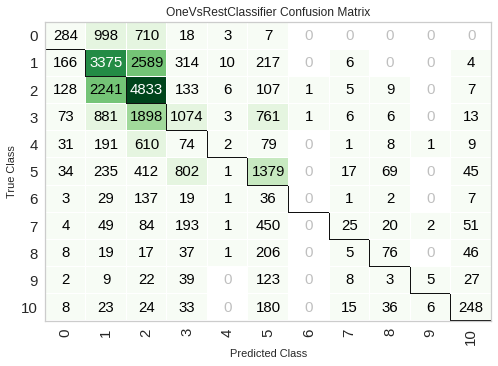

In [13]:
plot_model(catboost,  plot = 'confusion_matrix')

In [14]:
predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,One Vs Rest Classifier,0.4151,0,0.2408,0.3904,0.3809,0.249,0.2549


,case_id,Hospital_code,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,...,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,Stay,Label,Score
0,296773.0,26.0,4.0,21302.0,15.0,2.0,4562.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0.3829
1,18902.0,28.0,2.0,35813.0,1.0,3.0,4249.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,2,0.3605
2,87172.0,28.0,3.0,92715.0,22.0,5.0,3796.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,5,0.4175
3,294993.0,15.0,3.0,47558.0,6.0,6.0,4229.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,0.5685
4,9078.0,26.0,2.0,37219.0,5.0,3.0,5849.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,2,0.3701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27222,288600.0,11.0,2.0,43603.0,13.0,3.0,4205.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0.4012
27223,214334.0,29.0,2.0,5461.0,2.0,4.0,6475.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10,5,0.4174
27224,88783.0,9.0,3.0,29030.0,5.0,4.0,5136.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.4001
27225,13837.0,23.0,2.0,60047.0,2.0,4.0,4414.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8,5,0.4862


In [15]:
final_catboost = finalize_model(catboost)

KeyboardInterrupt: 

In [ ]:
print(final_catboost)

In [ ]:
predict_model(final_catboost);